In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plotter
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
import mne

In [5]:
raw = mne.io.read_raw_edf("Subject15_2.edf", preload=True)
#this is one of the methods to import and process edf files

Extracting EDF parameters from C:\Users\Kartavya\Desktop\Deep Learning\Physio\Subject0_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...


In [6]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>

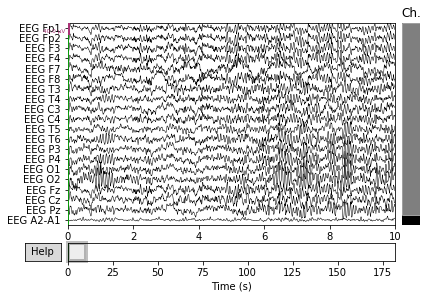

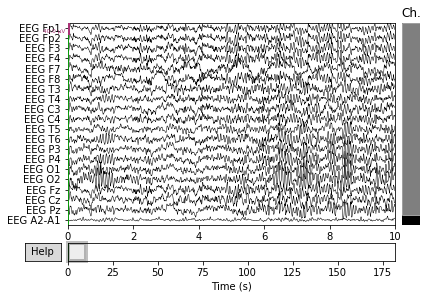

In [7]:
raw.plot()
#found this on internet idk what this is what it represents

In [8]:
from pyedflib import highlevel
#this is another method to process edf files

In [23]:
signals, signal_headers, header = highlevel.read_edf('Subject15_1.edf')
print("Signal Frequency is "+ str(signal_headers[0]['sample_rate'])) 
sfreq = signal_headers[0]['sample_rate']

Signal Frequency is 500


In [24]:
fourierTransform = np.fft.fft(signals[0])/len(signals[0])           # Normalize amplitude
#print("Before: " + str(fourierTransform))

fourierTransform = fourierTransform[range(int(len(signals[0])/2))] # Exclude sampling frequency
#print("After: " + str(fourierTransform))

tpCount     = 91000#len(amplitude)
values      = np.arange(int(tpCount/2))
print(values)
timePeriod  = tpCount/sfreq
frequencies = values/timePeriod

[    0     1     2 ... 45497 45498 45499]


Text(0, 0.5, 'Amplitude')

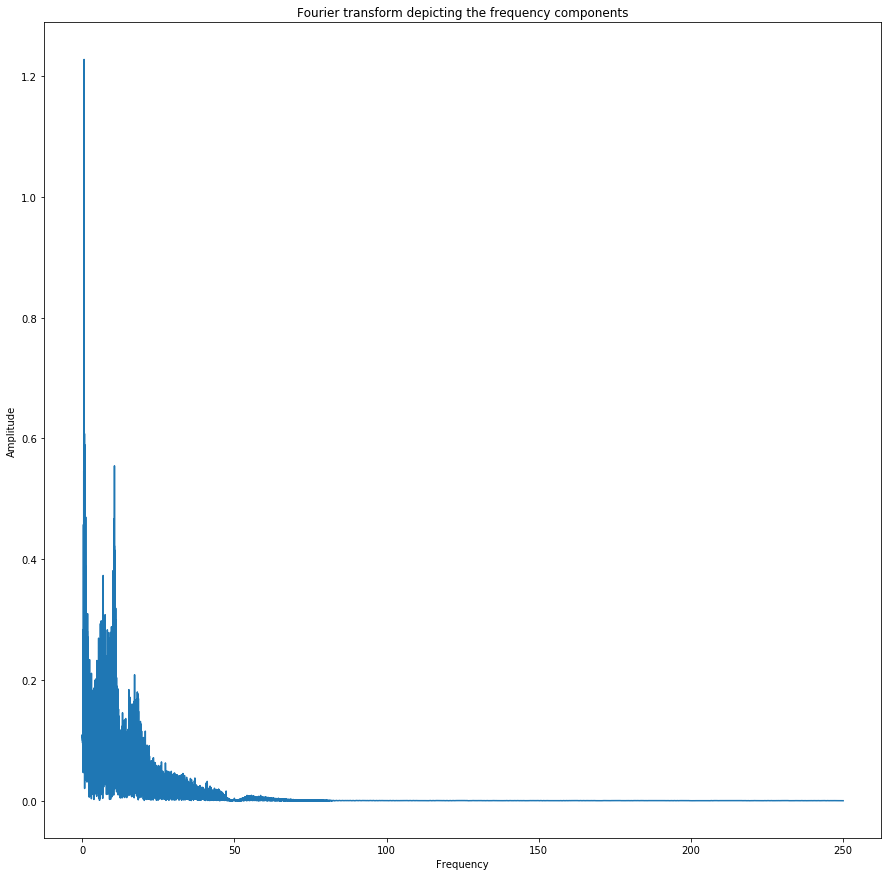

In [25]:
# Frequency domain representation
figure, axis = plotter.subplots(1, 1, figsize = (15, 15))
plotter.subplots_adjust(hspace=3)
axis.set_title('Fourier transform depicting the frequency components')
axis.plot(frequencies, abs(fourierTransform))
axis.set_xlabel('Frequency')
axis.set_ylabel('Amplitude')

In [16]:
#print the array
print(fourierTransform)

[4.89071924e-02+0.00000000e+00j 4.96447572e-02+2.25210619e-03j
 4.94494053e-02+4.47863448e-03j ... 6.71461638e-05-1.31831465e-05j
 7.09579410e-05-8.48950109e-06j 6.86158076e-05-5.17190419e-06j]


In [15]:
#save array into a csv file
np.savetxt("test1.csv", fourierTransform, delimiter=",")

In [9]:
plotter.show()

In [ ]:
print('plotted')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
[-1.69101124e+01+0.00000000e+00j  1.37460157e+01+2.52955261e+00j
 -1.49316251e+01-8.32103232e+00j  2.09172273e+01-1.49409231e+01j
  9.27282386e+00-1.38595201e+01j  5.15748030e+00-1.06451237e-01j
 -1.13724293e+00+3.48208719e+00j -1.65619504e+00-4.33433213e+00j
  9.89210050e-01-1.06096661e+01j -2.83511579e+00-6.82533774e+00j
  1.88056236e+00-8.33573789e-01j  2.06357505e+00+7.51361979e+00j
  2.43775581e+00-1.83220880e+01j  2.13385788e+01+1.48973021e+01j
  8.39507276e-01-3.67714964e+01j -1.29103657e+00-4.06655744e+00j
  3.84555385e+00-1.15835797e+01j -3.48471970e+00-3.92488019e+00j
 -3.35203989e+00-5.56134673e+00j  1.62237077e+00-6.37437531e+00j
 -1.13137101e+00+4.72454112e+00j  1.94221772e+00+4.48047828e-01j
 -1.74642144e

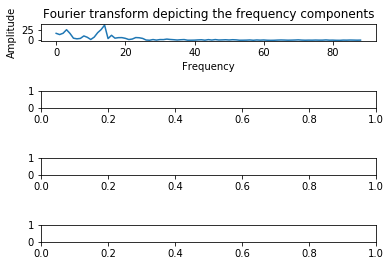

plotted


In [16]:
samplingFrequency = 178

amplitude = [135, 190, 229, 223, 192, 125, 55, -9, -33, -38, -10, 35, 64, 113, 152, 164, 127, 50, -47, -121, -138, -125, -101, -50, 11, 39, 24, 48, 64, 46, 13, -19, -61, -96, -130, -132, -116, -115, -71, -14, 25, 19, 6, 9, 21, 13, -37, -58, -33, 5, 47, 80, 101, 88, 73, 69, 41, -13, -31, -61, -80, -77, -66, -43, 5, 87, 129, 121, 88, 12, -76, -150, -207, -186, -165, -148, -103, -33, 40, 94, 75, 8, -81, -155, -227, -262, -233, -218, -187, -126, -65, -12, 27, 61, 49, 9, -46, -124, -210, -281, -265, -181, -89, -4, 53, 53, 38, 43, 31, 34, 9, -7, -34, -70, -84, -101, -70, -11, 42, 62, 66, 74, 64, 59, 56, 36, -11, -30, -43, -23, 8, 42, 77, 103, 135, 121, 79, 59, 43, 54, 90, 111, 107, 64, 32, 18, -25, -69, -65, -44, -33, -57, -88, -114, -130, -114, -83, -53, -79, -72, -85, -109, -98, -72, -65, -63, -11, 10, 8, -17, -15, -31, -77, -103, -127, -116, -83, -51] 

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
#print(fourierTransform)

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency
#print(fourierTransform)

 

tpCount     = 178#len(amplitude)

values      = np.arange(int(tpCount/2))
print(values)

timePeriod  = 1#tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation
figure, axis = plotter.subplots(4, 1)

plotter.subplots_adjust(hspace=3)
axis[0].set_title('Fourier transform depicting the frequency components')

 

axis[0].plot(frequencies, abs(fourierTransform))

axis[0].set_xlabel('Frequency')

axis[0].set_ylabel('Amplitude')

print(fourierTransform)

plotter.show()
print('plotted')